# ADP

##                      2. 정형 데이터마이닝 (사용 데이터 : Titanic)   
***

### Q1) cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 
###     문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.
###     또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고
###     age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오. <br>
**변수** | **데이터형태** | **설명**
---|:---:|---:
`pclass` | 수치형 | 1,2,3등석 정보
`survived` | 범주형 | 생존 여부(0 : 사망, 1 : 생존)
`name` | 문자형 | 이름
`sex` | 범주형 | 성별
`age` | 수치형 | 나이
`sibsp` | 수치형 | 함께 탑승한 형제 또는 배우자의 수
`parch` | 수치형 | 함께 탑승한 형제 또는 자녀의 수
`ticket` | 문자형 | 티켓번호
`fare` | 수치형 | 티켓요금
`cabin` | 문자형 |선실번호
`embarked` | 범주형 | 탑승한 곳

In [97]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df = pd.read_csv("C:/Users/kcisa/Desktop/ADP실기/모의고사 2회/titanic.csv")

In [66]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [68]:
char_cols = ['name','ticket','cabin']
cat_cols = ['survived','sex','embarked']

In [69]:
df[char_cols] = df[char_cols].astype('str')

In [70]:
df[cat_cols] = df[cat_cols].astype('category')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   category
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   ticket    1309 non-null   object  
 8   fare      1308 non-null   float64 
 9   cabin     1309 non-null   object  
 10  embarked  1307 non-null   category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 86.1+ KB


In [72]:
df['age'].fillna(df.age.median(), inplace = True)
df['fare'].fillna(df.fare.median(), inplace = True)
df.embarked.fillna(mode(df.embarked)[0][0], inplace = True)

In [73]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

**범주** | **범위** | 
---|:---:|
0 | 0이상 10미만| 
1 | 10이상 20미만 | 
2 | 20이상 30미만 | 
3 | 30이상 40미만 |
4 | 40이상 50미만|
5 | 50이상 60미만 | 
6 | 60이상 70미만 | 
7 | 70이상 80미만 | 
8 | 80이상 90미만 | 

In [74]:
def age_cat(x) :
    if x < 10 :
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 :
        return 4
    elif x < 60 :
        return 5
    elif x < 70 :
        return 6
    elif x < 80 :
        return 7
    else :
        return 8

In [75]:
df['age_1'] = df.age.apply(age_cat)

In [76]:
df.describe(include = 'all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
count,1309.000000,1309.0,1309,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309,1309,1309.000000
unique,NaN,2.0,1307,2,NaN,NaN,NaN,929,NaN,187,3,NaN
top,NaN,0.0,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,nan,S,NaN
freq,NaN,809.0,2,843,NaN,NaN,NaN,11,NaN,1014,916,NaN
mean,2.294882,NaN,NaN,NaN,29.503186,0.498854,0.385027,NaN,33.281086,NaN,NaN,2.438503
std,0.837836,NaN,NaN,NaN,12.905241,1.041658,0.865560,NaN,51.741500,NaN,NaN,1.338760
min,1.000000,NaN,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,2.000000
50%,3.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,2.000000
75%,3.000000,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,3.000000


***
### Q2) 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오.
###    (set.seed(12345)를 실행한 후 데이터를 분할하시오.) 
###    또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, 
###    fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 
###    예측값을 csv파일로 각각 제출하시오.

In [86]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

In [78]:
X = df[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']]
y = df.survived

In [79]:
X['sex'] = LabelEncoder().fit_transform(X['sex'])
X['embarked'] = LabelEncoder().fit_transform(X['embarked'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 12345)

In [83]:
model1 = RandomForestClassifier(random_state = 12345)
model2 = GradientBoostingClassifier(random_state = 12345)
model3 = XGBClassifier(random_state = 12345)
model4 = LGBMClassifier(random_state = 12345)

In [84]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

LGBMClassifier(random_state=12345)

In [88]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [112]:
#pd.DataFrame({'survived' : pred1}, index = X_test.index).to_csv("랜덤포레스트예측값.csv", index = False)
#pd.DataFrame({'survived' : pred2}, index = X_test.index).to_csv("그래디언트부스팅예측값.csv", index = False)
#pd.DataFrame({'survived' : pred3}, index = X_test.index).to_csv("xgboost예측값.csv", index = False)
#pd.DataFrame({'survived' : pred4}, index = X_test.index).to_csv("lgbm예측값.csv", index = False)

In [89]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       233
           1       0.71      0.64      0.67       160

    accuracy                           0.75       393
   macro avg       0.74      0.73      0.73       393
weighted avg       0.75      0.75      0.75       393



In [90]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       233
           1       0.77      0.69      0.73       160

    accuracy                           0.79       393
   macro avg       0.79      0.78      0.78       393
weighted avg       0.79      0.79      0.79       393



In [91]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       233
           1       0.74      0.67      0.70       160

    accuracy                           0.77       393
   macro avg       0.77      0.75      0.76       393
weighted avg       0.77      0.77      0.77       393



In [92]:
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       233
           1       0.77      0.62      0.69       160

    accuracy                           0.77       393
   macro avg       0.77      0.74      0.75       393
weighted avg       0.77      0.77      0.76       393



In [94]:
fpr1, tpr1, th = roc_curve(y_test, pred1)
fpr2, tpr2, th = roc_curve(y_test, pred2)
fpr3, tpr3, th = roc_curve(y_test, pred3)
fpr4, tpr4, th = roc_curve(y_test, pred4)

In [104]:
def plot_rc(fpr, tpr, label = None) :
    plt.plot(fpr, tpr, linewidth = 2, label = label, linestyle = '--', color = 'r')
    plt.plot([0,1], [0,1], color = 'b')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    print(f'auc 점수는 {np.round(auc(fpr, tpr), 4)}')

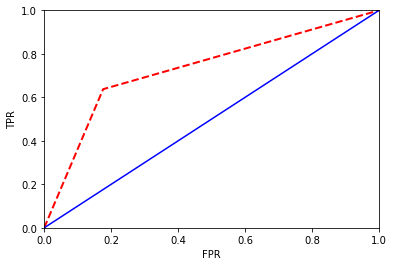

auc 점수는 0.7308


In [105]:
plot_rc(fpr1, tpr1, th)

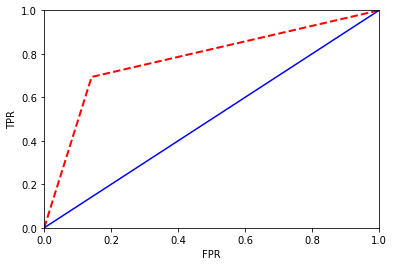

auc 점수는 0.7761


In [106]:
plot_rc(fpr2, tpr2, th)

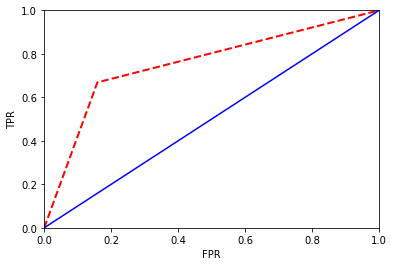

auc 점수는 0.755


In [107]:
plot_rc(fpr3, tpr3, th)

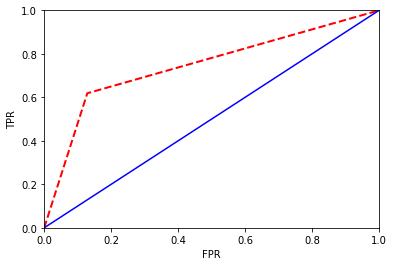

auc 점수는 0.745


In [108]:
plot_rc(fpr4, tpr4, th)

분석 결과 GradientBoostingClassifier의 AUC가 가장 높게 나타났다. 정확도 측면에서도 해당 모델이 가장 좋은 성능을 보였다. 데이터의 특성에 따라서 정확도를 제외한 특이도, 민감도 등도 함께 고려하여 데이터와 상황에 가장 적절한 모델을 선택해야 한다.